In [16]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'C:/Users/Augus/Desktop/tx-ev_aoption-rate-population.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0  year state           county  \
0         294  2012    TX  Anderson County   
1         420  2013    TX  Anderson County   
2         577  2014    TX  Anderson County   
3         738  2015    TX  Anderson County   
4         890  2016    TX  Anderson County   

                                           zip_codes  population  \
0  [75763, 75779, 75801, 75802, 75803, 75832, 758...       58059   
1  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57960   
2  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57829   
3  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57639   
4  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57526   

   ev_registrations  ev_growth_rate  adopton rate  
0                16             NaN      0.000276  
1                11       -0.312500      0.000190  
2                40        2.636364      0.000692  
3                42        0.050000      0.000729  
4                13       -0.690476      0.000226  


In [17]:
# Convert 'adopton rate' column to numeric by stripping the '%' sign and converting to float
df['adopton rate'] = df['adopton rate'].fillna('').astype(str).str.rstrip('%')
df['adopton rate'] = pd.to_numeric(df['adopton rate'], errors='coerce') / 100

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)

Missing values in each column:
 Unnamed: 0            0
year                  0
state                 0
county                0
zip_codes             0
population            0
ev_registrations      0
ev_growth_rate      162
adopton rate          0
dtype: int64

Data types of each column:
 Unnamed: 0            int64
year                  int64
state                object
county               object
zip_codes            object
population            int64
ev_registrations      int64
ev_growth_rate      float64
adopton rate        float64
dtype: object


In [18]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Data after removing missing values:")
print(df_cleaned.head())

# Check for any remaining missing values
print("\nRemaining missing values in each column:\n", df_cleaned.isnull().sum())


Data after removing missing values:
   Unnamed: 0  year state           county  \
1         420  2013    TX  Anderson County   
2         577  2014    TX  Anderson County   
3         738  2015    TX  Anderson County   
4         890  2016    TX  Anderson County   
5        1048  2017    TX  Anderson County   

                                           zip_codes  population  \
1  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57960   
2  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57829   
3  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57639   
4  [75763, 75779, 75801, 75802, 75803, 75832, 758...       57526   
5  [75763, 75779, 75801, 75802, 75803, 75832, 758...       58175   

   ev_registrations  ev_growth_rate  adopton rate  
1                11       -0.312500      0.000002  
2                40        2.636364      0.000007  
3                42        0.050000      0.000007  
4                13       -0.690476      0.000002  
5                6

In [19]:
# Group by year to calculate total EV registrations per year
total_ev_registrations_per_year = df_cleaned.groupby('year')['ev_registrations'].sum().reset_index()

# Display the total EV registrations per year
print("Total EV Registrations Per Year:")
print(total_ev_registrations_per_year)

Total EV Registrations Per Year:
    year  ev_registrations
0   2010               383
1   2011              7446
2   2012             19155
3   2013             46816
4   2014             56528
5   2015             64911
6   2016             79790
7   2017            124287
8   2018            216911
9   2019            150395
10  2020            186993
11  2021            329786
12  2022            390473
13  2023            509985
14  2024             82760


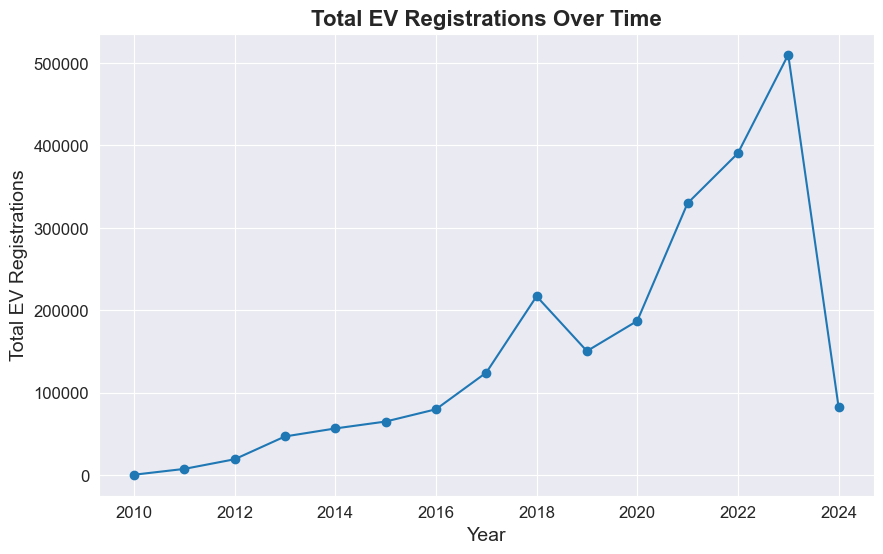

In [20]:
import matplotlib.pyplot as plt

# Plot total EV registrations over time
plt.figure(figsize=(10, 6))
plt.plot(total_ev_registrations_per_year['year'], total_ev_registrations_per_year['ev_registrations'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total EV Registrations')
plt.title('Total EV Registrations Over Time')
plt.grid(True)
plt.show()

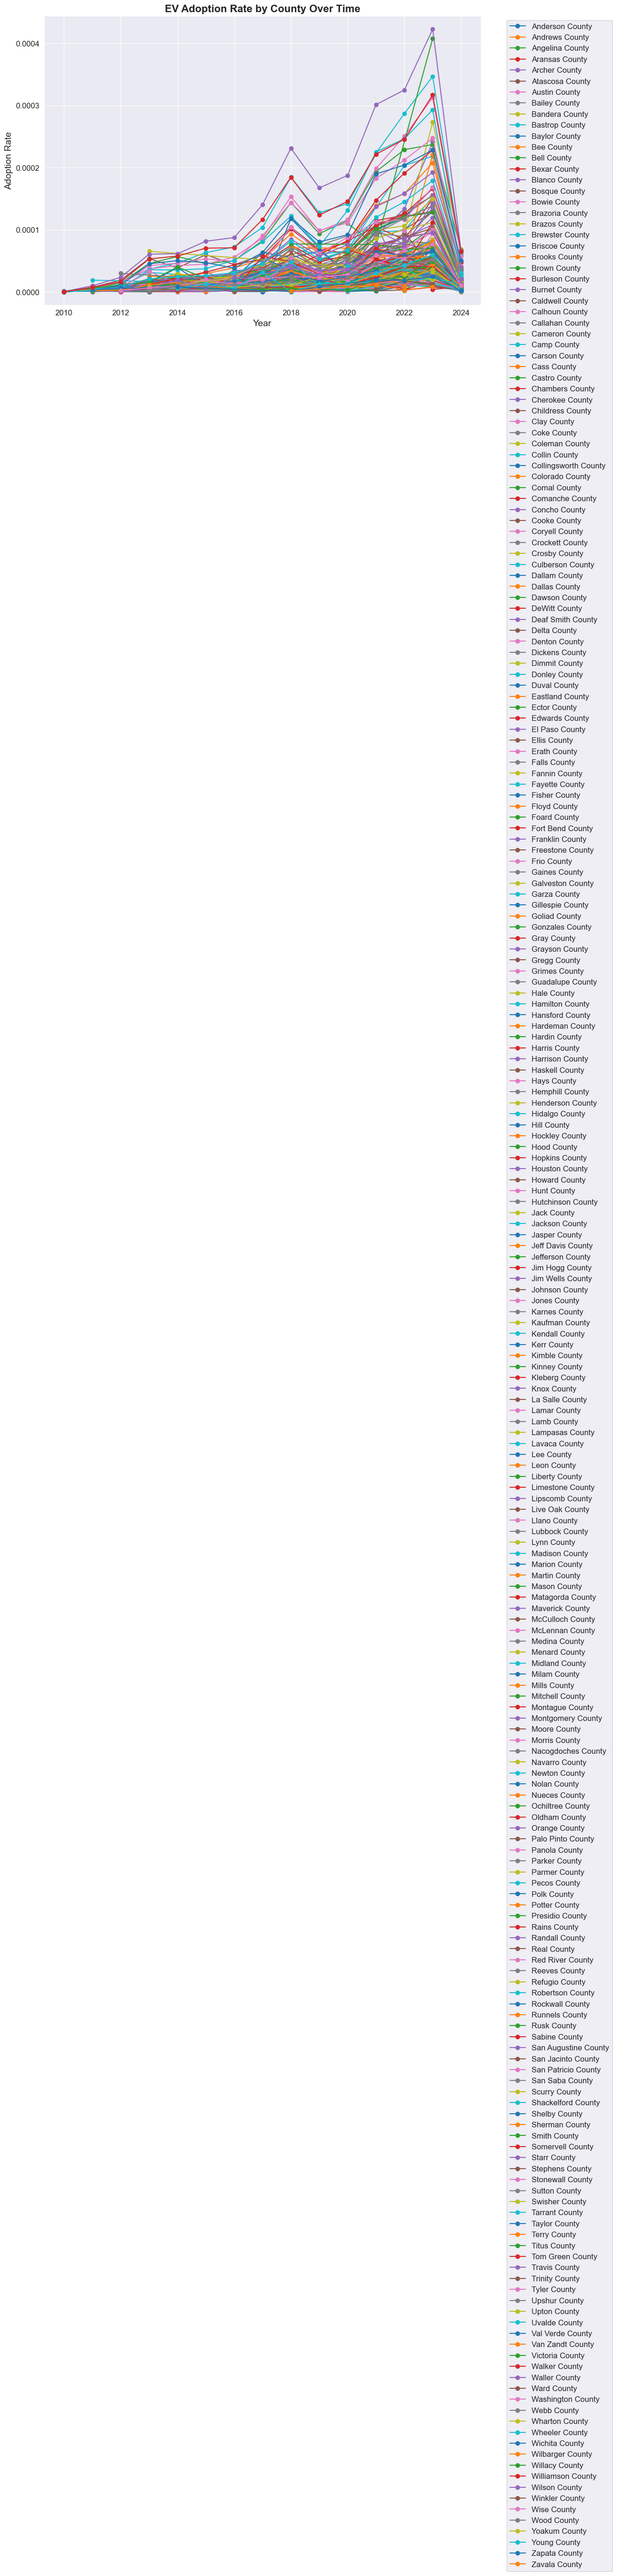

In [21]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Group data by county and year, then calculate the mean adoption rate
counties = df_cleaned['county'].unique()
for county in counties:
    county_data = df_cleaned[df_cleaned['county'] == county]
    plt.plot(county_data['year'], county_data['adopton rate'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.title('EV Adoption Rate by County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend to be outside the plot
plt.grid(True)
plt.show()

In [22]:
# Calculate the standard deviation of the adoption rate for each county
std_dev_by_county = df_cleaned.groupby('county')['adopton rate'].std().reset_index()

# Set a threshold for identifying "sporadic" counties (mean + standard deviation)
std_threshold = std_dev_by_county['adopton rate'].mean() + std_dev_by_county['adopton rate'].std()

# Identify counties with standard deviation above the threshold
sporadic_counties = std_dev_by_county[std_dev_by_county['adopton rate'] > std_threshold]['county'].tolist()

# Print the list of counties with drastic changes
print("Counties with drastic changes in EV adoption rates:")
for county in sporadic_counties:
    print(county)


Counties with drastic changes in EV adoption rates:
Bexar County
Blanco County
Brazoria County
Brazos County
Collin County
Comal County
Crockett County
Culberson County
Dallas County
Denton County
Dickens County
Edwards County
Foard County
Fort Bend County
Gillespie County
Harris County
Hays County
Jeff Davis County
Kendall County
Llano County
Montgomery County
Rockwall County
Tarrant County
Travis County
Williamson County


In [23]:
# Define the variables with assumed values
revenue_per_ev = 30000  
production_cost_per_ev = 25000 
fixed_costs = 1000000 

# Initialize a DataFrame to store the profit model results
profit_data = {
    'Year': [],
    'County': [],
    'EVs Sold': [],
    'Revenue ($)': [],
    'Total Costs ($)': [],
    'Profit ($)': []
}

# Calculate profit for each county and year
for _, row in df_cleaned.iterrows():
    year = row['year']
    county = row['county']
    adoption_rate = row['adopton rate']
    population = row['population']
    evs_sold = population * adoption_rate
    revenue = evs_sold * revenue_per_ev
    variable_costs = evs_sold * production_cost_per_ev
    total_costs = fixed_costs + variable_costs
    profit = revenue - total_costs
    
    # Store results in the data dictionary
    profit_data['Year'].append(year)
    profit_data['County'].append(county)
    profit_data['EVs Sold'].append(evs_sold)
    profit_data['Revenue ($)'].append(revenue)
    profit_data['Total Costs ($)'].append(total_costs)
    profit_data['Profit ($)'].append(profit)

# Convert the profit data dictionary to a DataFrame
df_profit = pd.DataFrame(profit_data)

# Display the profit model DataFrame
print("Profit Model:")
print(df_profit.head())


Profit Model:
   Year           County  EVs Sold   Revenue ($)  Total Costs ($)  \
0  2013  Anderson County      0.11   3299.998968     1.002750e+06   
1  2014  Anderson County      0.40  11999.991698     1.010000e+06   
2  2015  Anderson County      0.42  12599.994914     1.010500e+06   
3  2016  Anderson County      0.13   3900.003933     1.003250e+06   
4  2017  Anderson County      0.67  20099.991892     1.016750e+06   

      Profit ($)  
0 -999450.000172  
1 -998000.001384  
2 -997900.000848  
3 -999349.999345  
4 -996650.001351  


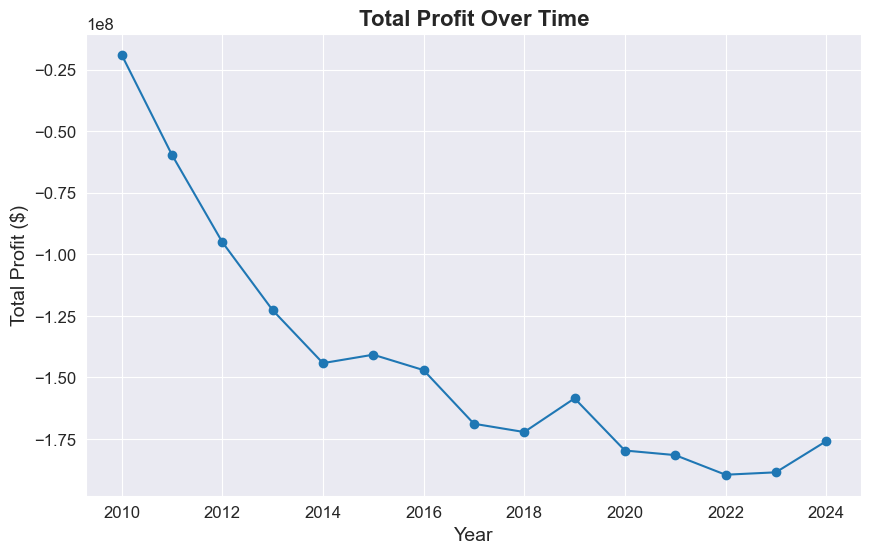

In [24]:
import matplotlib.pyplot as plt

# Calculate total profit per year
total_profit_per_year = df_profit.groupby('Year')['Profit ($)'].sum().reset_index()

# Plot total profit over time
plt.figure(figsize=(10, 6))
plt.plot(total_profit_per_year['Year'], total_profit_per_year['Profit ($)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit Over Time')
plt.grid(True)
plt.show()


C:\Users\Augus\AppData\Local\Temp\ipykernel_16040\2295999074.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


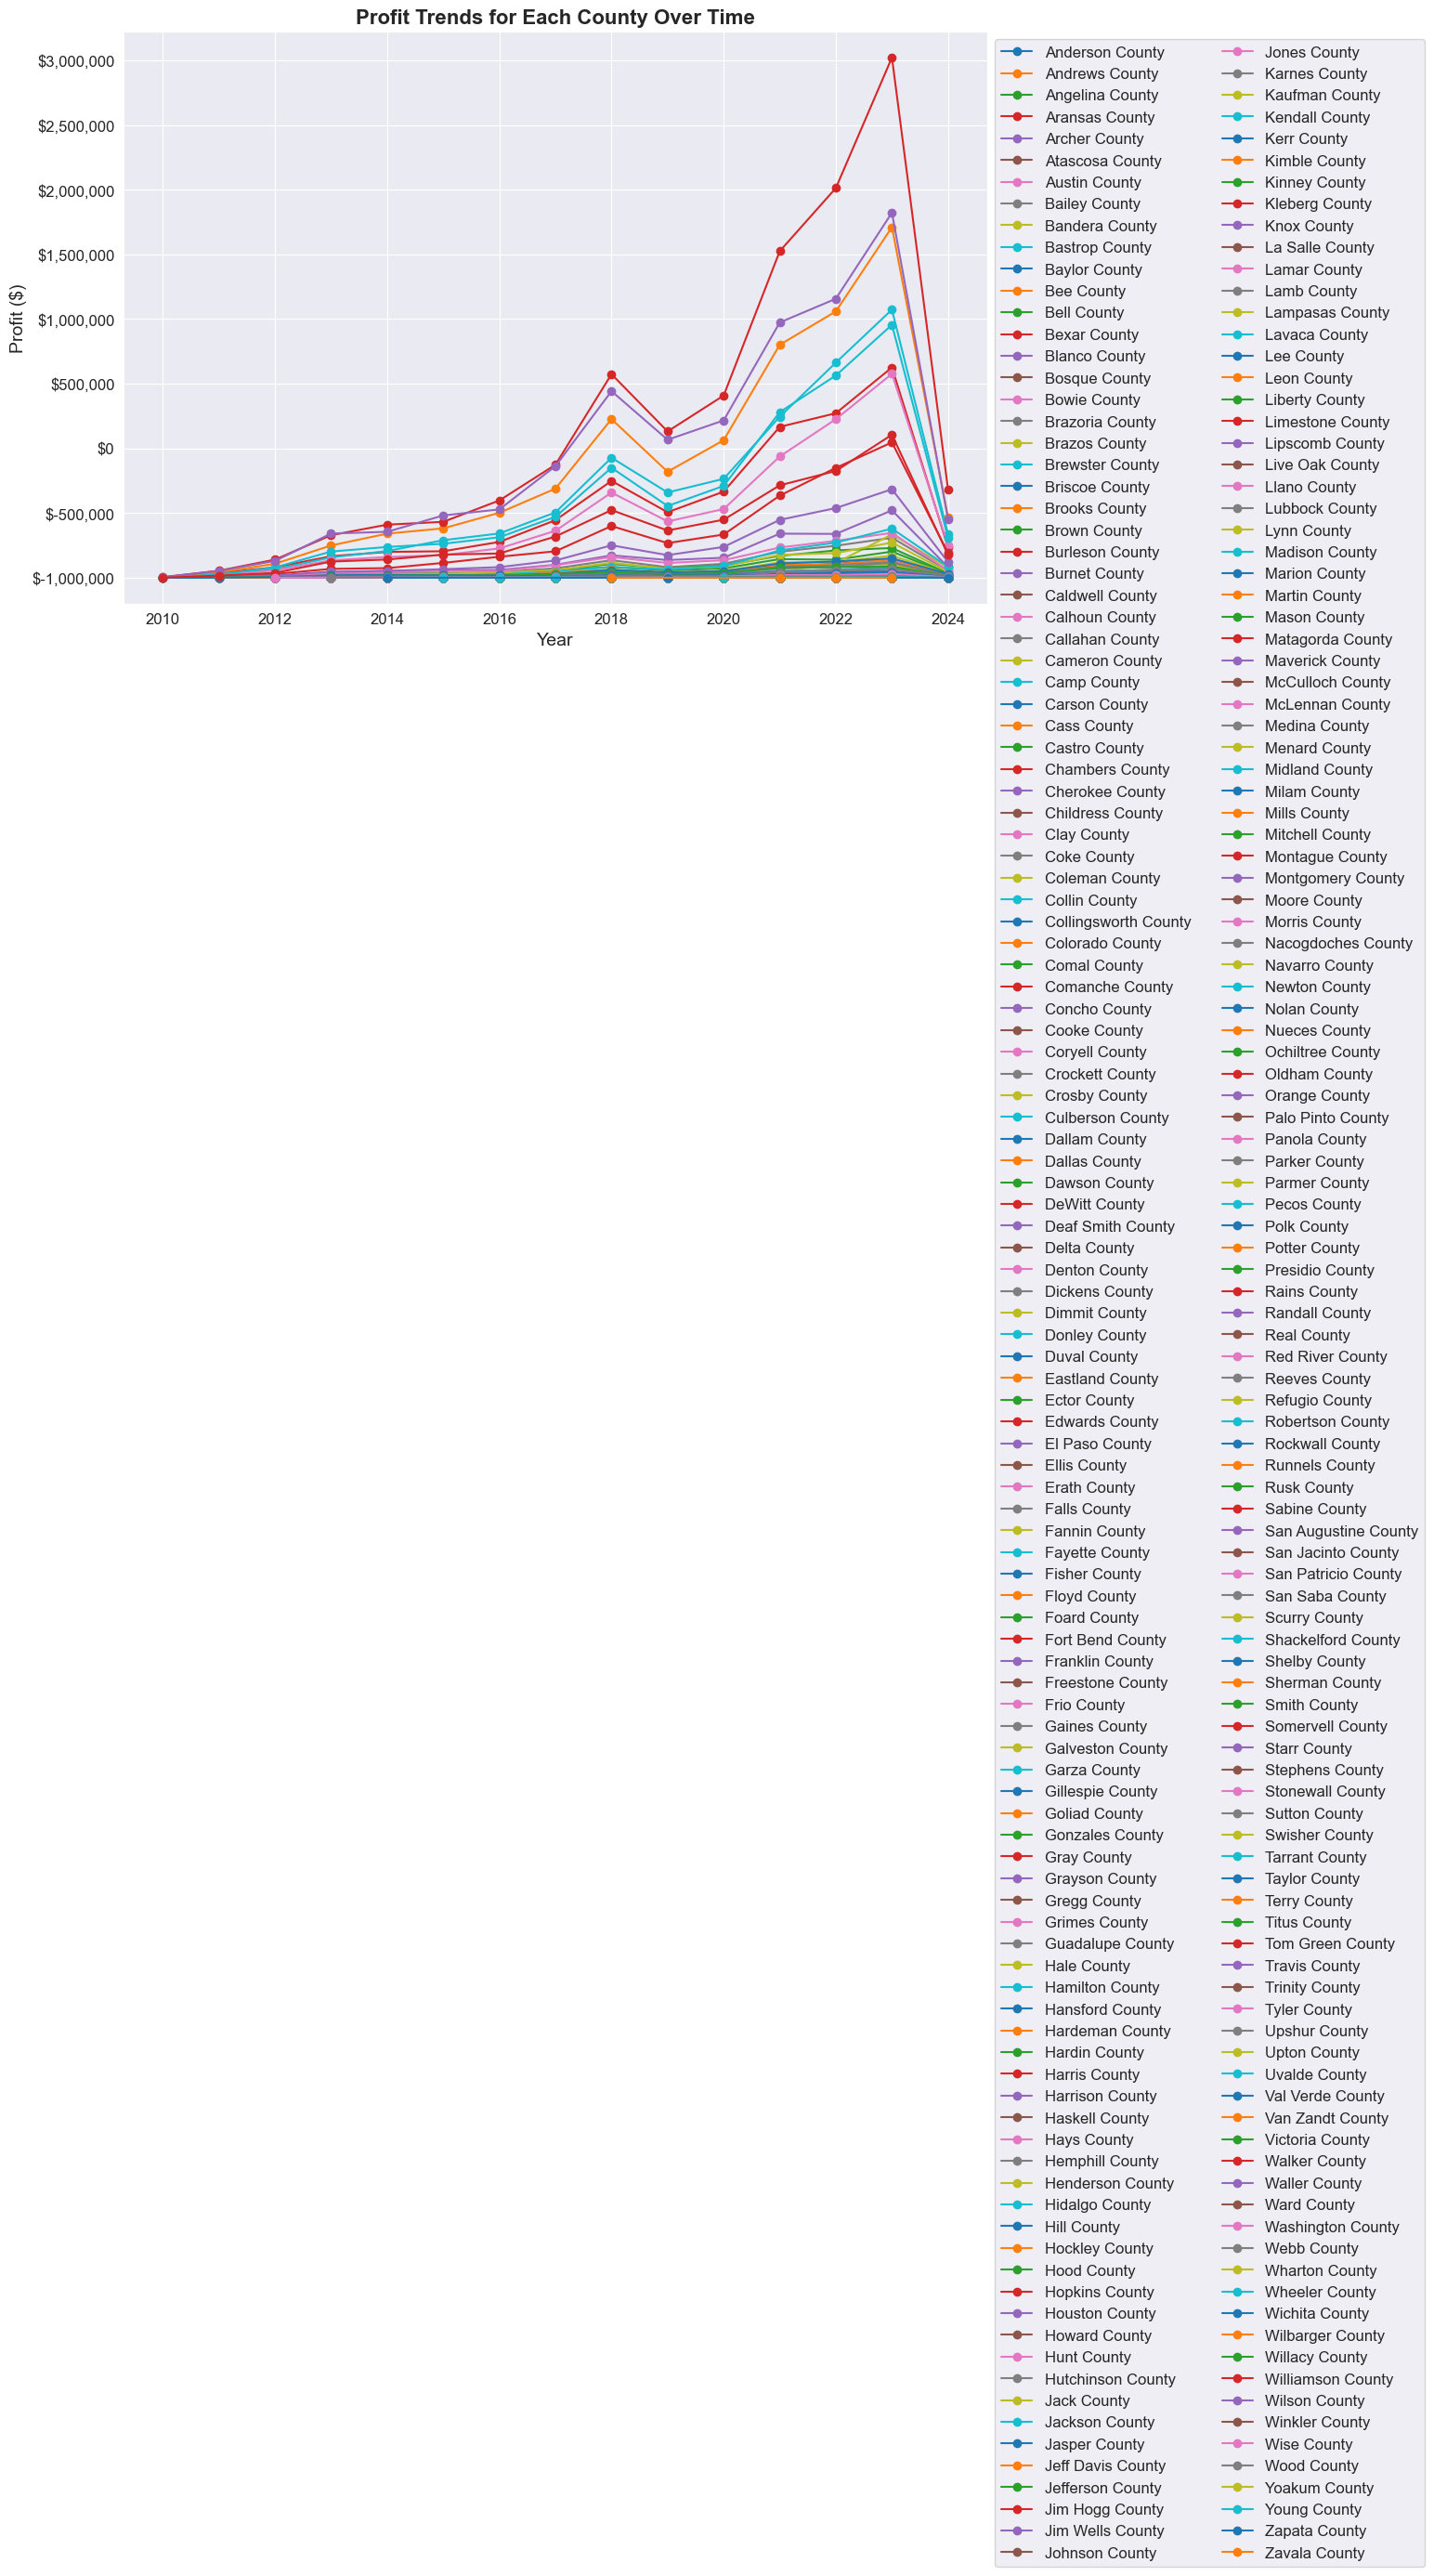

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Your existing plot code here
for county in df_profit['County'].unique():
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Each County Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)

# Show plot
plt.tight_layout()
plt.show()

C:\Users\Augus\AppData\Local\Temp\ipykernel_16040\3633635830.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


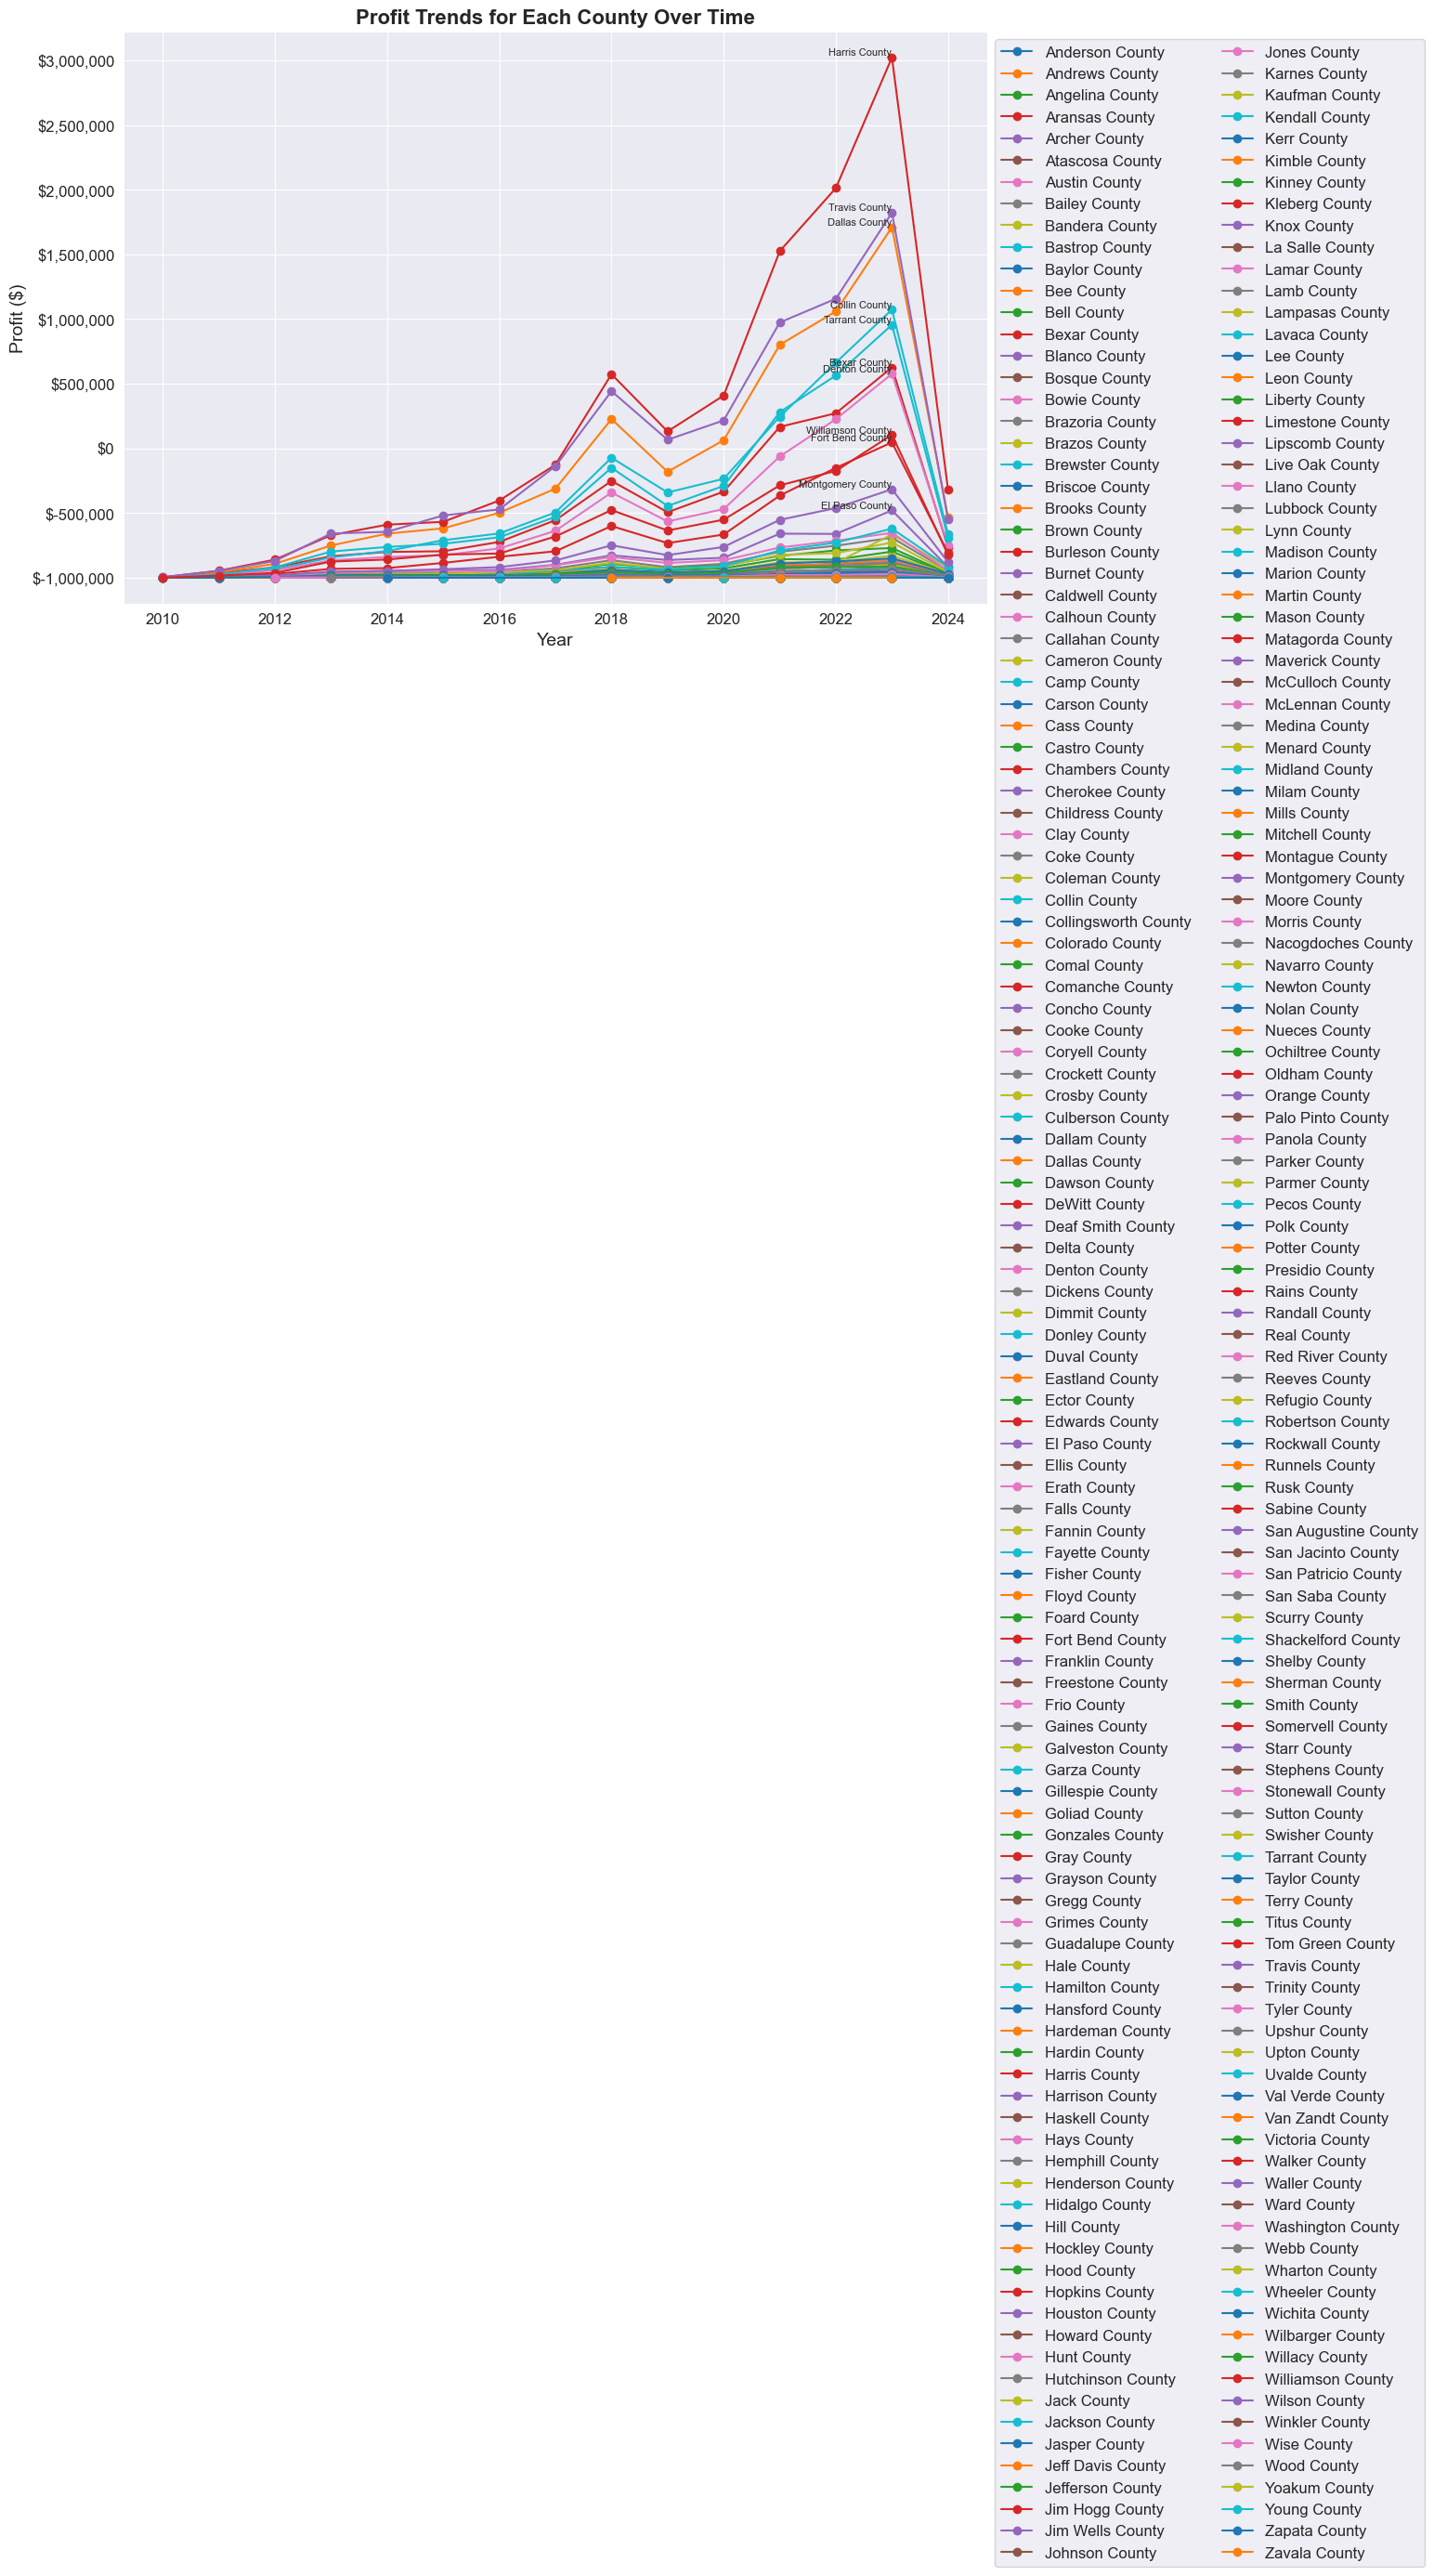

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each county to plot its data
for county in df_profit['County'].unique():
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county, only if the maximum is above -500,000
    max_profit_row = county_data[county_data['Profit ($)'] > -500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=8, ha='right', va='bottom')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Each County Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()

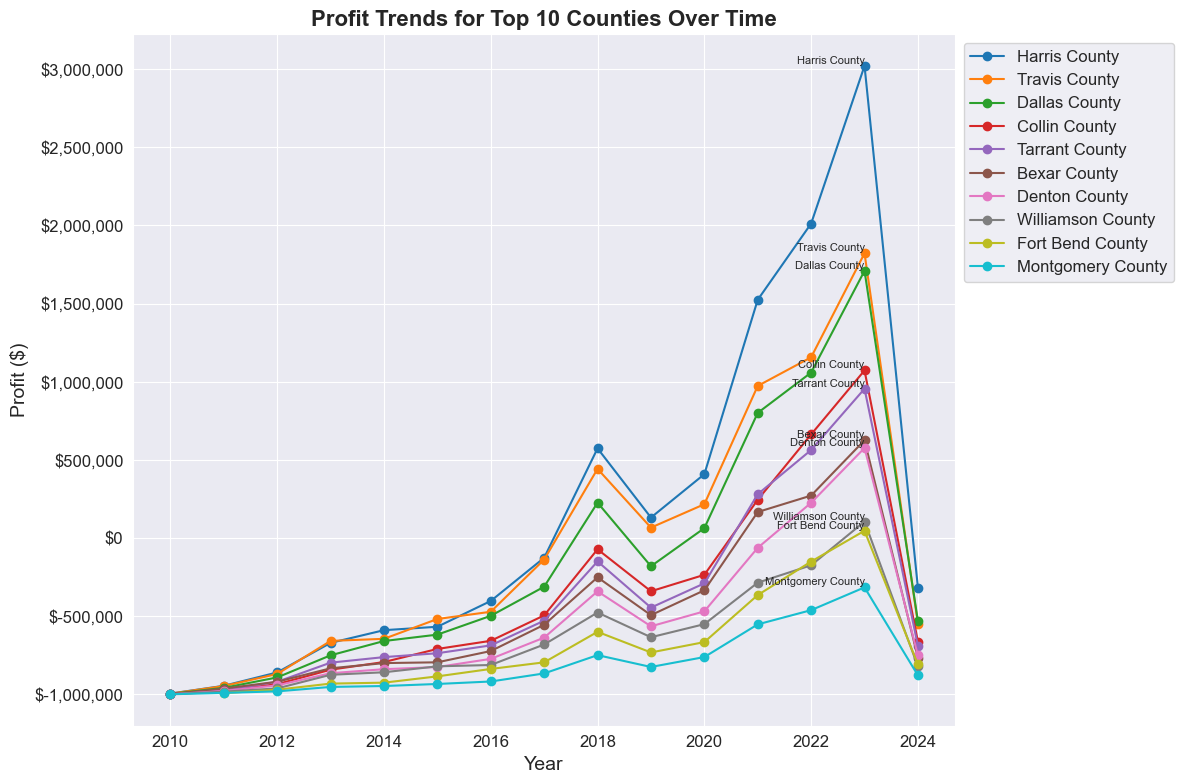

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Identify the top 10 counties based on maximum profit
top_counties = df_profit.groupby('County')['Profit ($)'].max().nlargest(10).index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each of the top counties to plot its data
for county in top_counties:
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county
    max_profit_row = county_data[county_data['Profit ($)'] > -500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=8, ha='right', va='bottom')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Top 10 Counties Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend to display only the top 10 counties
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()


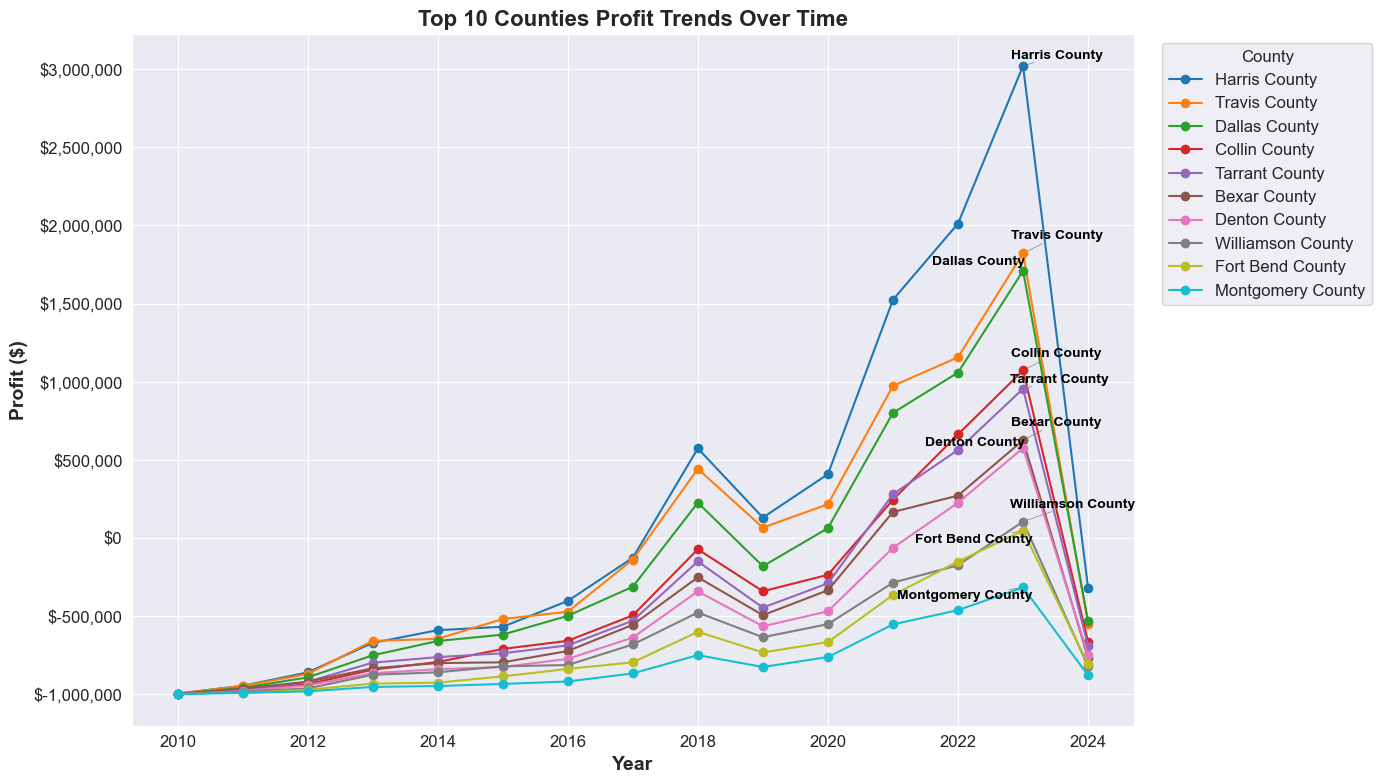

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text

# Set the style to match the desired background
sns.set_style("darkgrid")

# Adjust the overall font size and title weight
plt.rc('font', size=12)          # Adjust general font size
plt.rc('axes', titlesize=16)     # Set title font size
plt.rc('axes', titleweight='bold') # Make title bold
plt.rc('axes', labelsize=14)     # Set label font size
plt.rc('legend', fontsize=12)    # Set legend font size

# Identify the top 10 counties based on maximum profit
top_counties = df_profit.groupby('County')['Profit ($)'].max().nlargest(10).index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))  # Make the figure slightly wider

# Create a list to hold text objects for adjustment
texts = []

# Loop through each of the top counties to plot its data
for county in top_counties:
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county
    max_profit_row = county_data[county_data['Profit ($)'] > -500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            text = ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=10, weight='bold', ha='right', va='bottom', color='black')
            texts.append(text)  # Collect all text labels for adjustment

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Set axis labels and title with desired font weight
ax.set_xlabel('Year', fontsize=14, weight='bold')
ax.set_ylabel('Profit ($)', fontsize=14, weight='bold')
ax.set_title('Top 10 Counties Profit Trends Over Time', fontsize=16, weight='bold')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend to have a title and be inside the plot
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True)

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()


